In [ ]:
import os
os.chdir('/content/drive/MyDrive/MADE/MO_ML/homework_2')


In [ ]:
!pip install nose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nose
from nose.tools import assert_almost_equal, ok_, eq_
from nose.plugins.attrib import attr
from io import StringIO
import numpy as np
import random
import scipy
import scipy.sparse
import scipy.optimize
import sys
import unittest
import warnings
import oracles
import methods
import plot_trajectory_2d
import matplotlib.pyplot as plt
from scipy.sparse import diags
%matplotlib inline



###2.1 Методы и оракулы (6 баллов)

Запустим тесты на oracles.py и methods.py

In [ ]:
!python tests.py

.......
----------------------------------------------------------------------
Ran 7 tests in 0.019s

OK


###2.2 Траектория градиентного спуска на квадратичной функции. (3 балла)

In [ ]:
#Generate quadratic problems

x_0 = np.array([-0.8, 1.1])

A1 = np.array([[3, 0], [0, 3]])
A3 = np.array([[11, 0.1], [0.1, 1]])
A2 = np.array([[0.2, 0.1], [0.1, 0.3]])
b = np.array([2, 5])

A = [A1, A2, A3]

print(f'Начальная точка х0={x_0}')
for i, A_i in enumerate(A):
  print(f'Матрица A_{i}:')
  print(A_i, np.linalg.cond(A_i))

print(f'Вектор b={b}')
          

Начальная точка х0=[-0.8  1.1]
Матрица A_0:
[[3 0]
 [0 3]] 1.0
Матрица A_1:
[[0.2 0.1]
 [0.1 0.3]] 2.618033988749896
Матрица A_2:
[[11.   0.1]
 [ 0.1  1. ]] 11.012010809848945
Вектор b=[2 5]


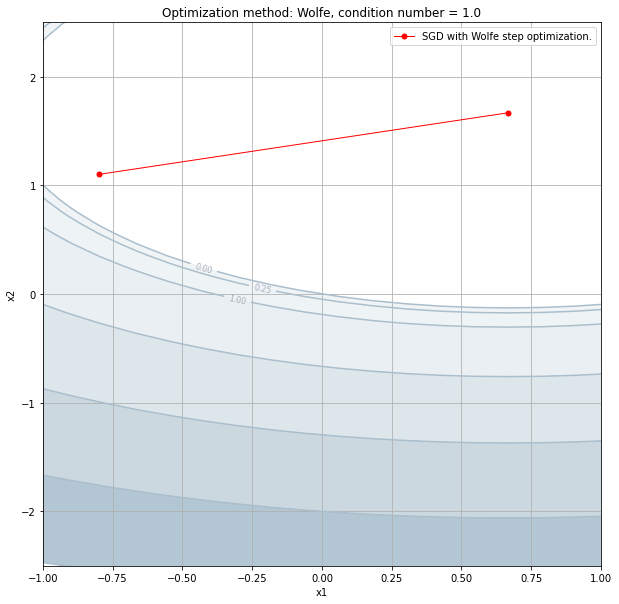

Solution: [0.66666667 1.66666667]
Iteration number: 1
------------------------------//--------------------------------------


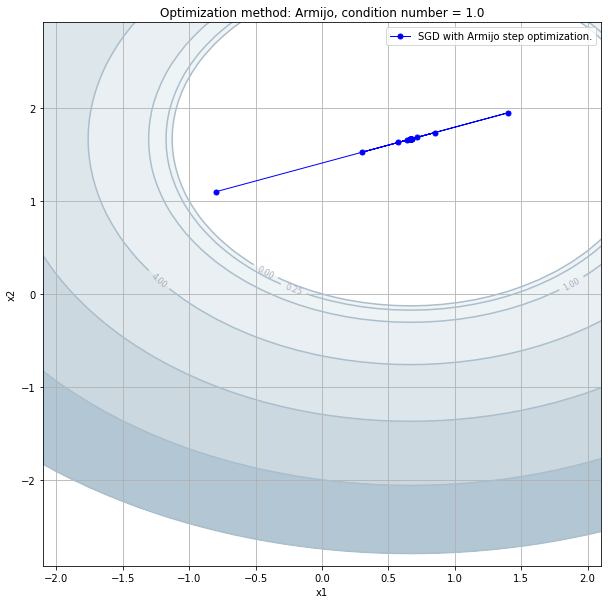

Solution: [0.66667786 1.66667099]
Iteration number: 17
------------------------------//--------------------------------------


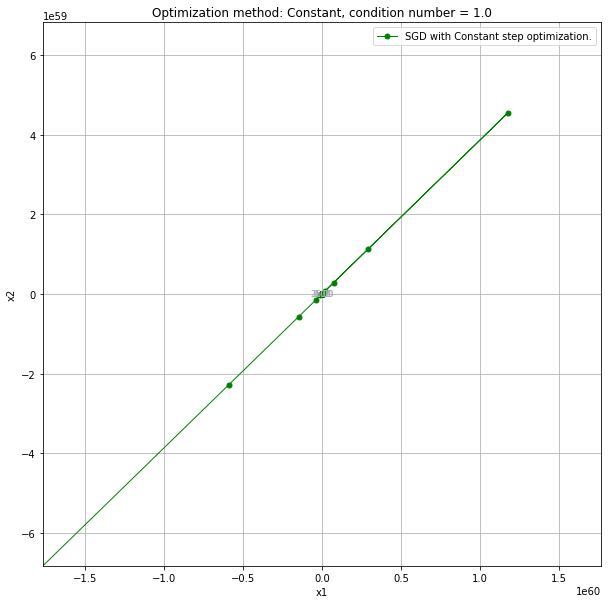

Solution: [-2.35684246e+60 -9.10598225e+59]
Iteration number: 200
------------------------------//--------------------------------------


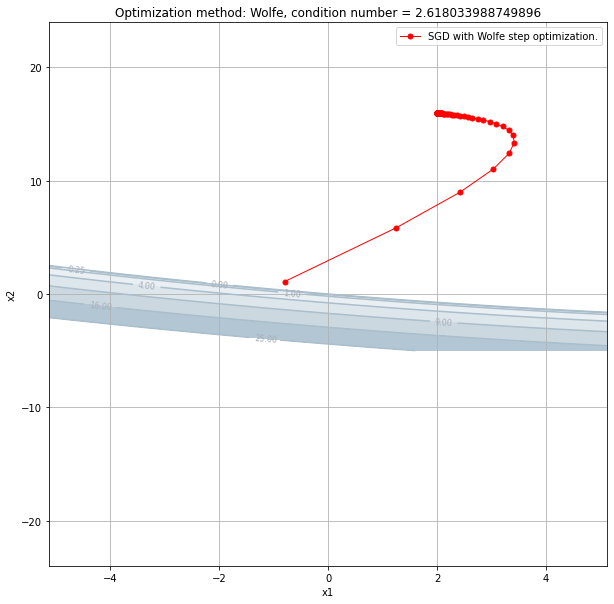

Solution: [ 2.00029363 15.99981852]
Iteration number: 65
------------------------------//--------------------------------------


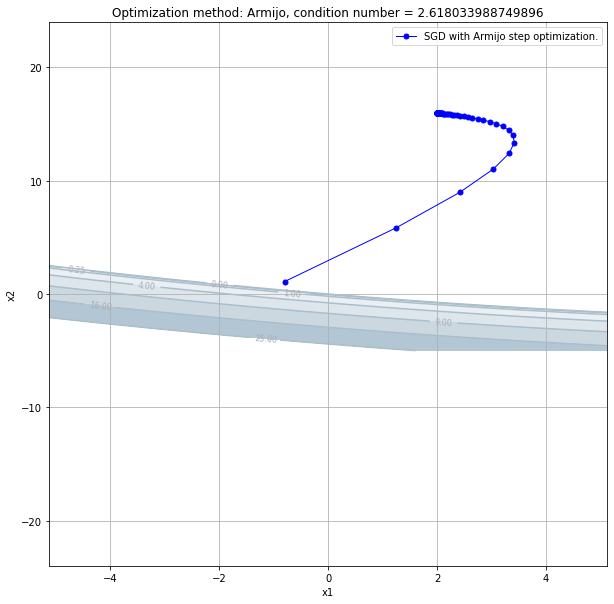

Solution: [ 2.00029363 15.99981852]
Iteration number: 65
------------------------------//--------------------------------------


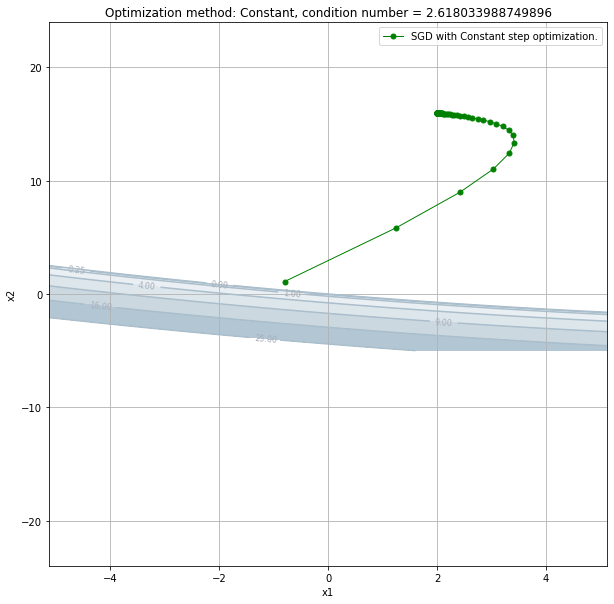

Solution: [ 2.00029363 15.99981852]
Iteration number: 65
------------------------------//--------------------------------------


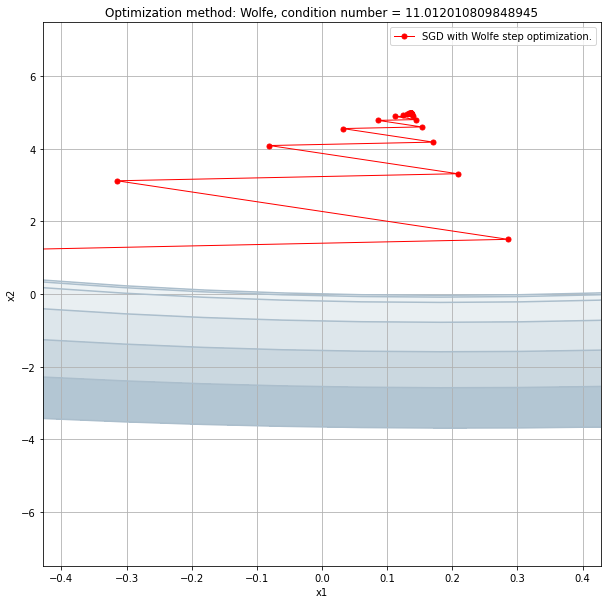

Solution: [0.13649029 4.98629099]
Iteration number: 31
------------------------------//--------------------------------------


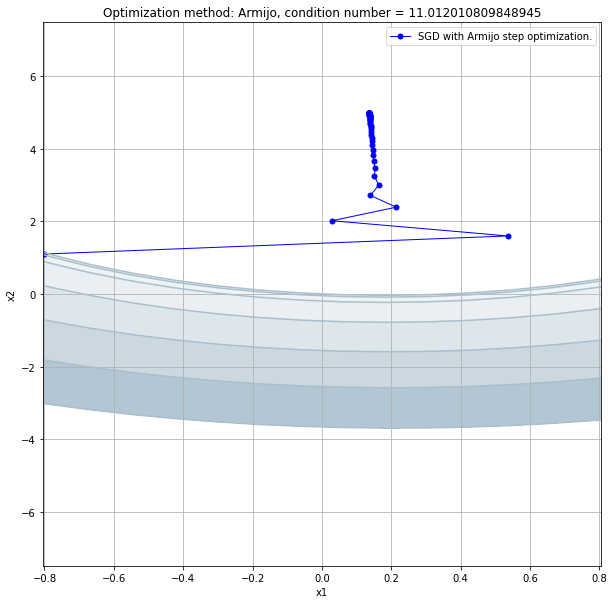

Solution: [0.13648874 4.98624843]
Iteration number: 79
------------------------------//--------------------------------------


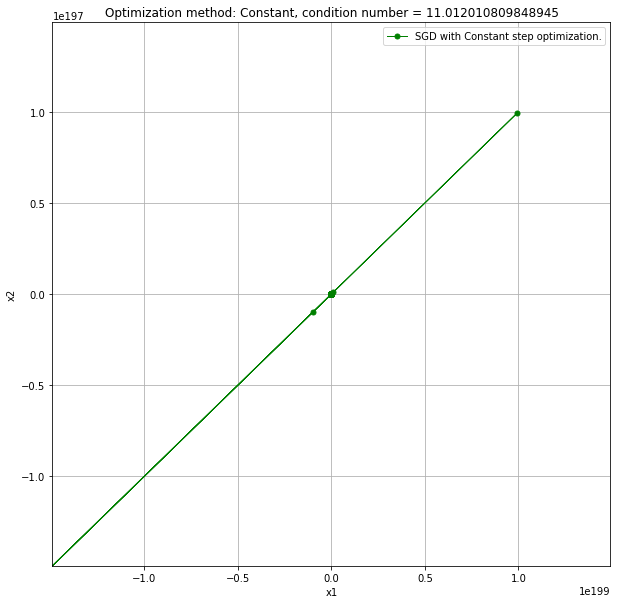

Solution: [-9.94948207e+199 -9.94848732e+197]
Iteration number: 200
------------------------------//--------------------------------------


In [ ]:
line_search_opt = [{'method': 'Wolfe', 'color': 'red'}, {'method': 'Armijo', 'color': 'blue'}, {'method': 'Constant', 'color': 'green'}]

for A_i in A:
    function = oracles.QuadraticOracle(A_i, b)
    
    
    
    for line_search_option in line_search_opt:
        method = methods.GradientDescent(function, x_0, tolerance=1e-10, line_search_options=line_search_option)
        x_k = method.run(200)
        plt.figure(figsize=(10, 10))
        plot_trajectory_2d.plot_trajectory(function.func, method.hist['x'], fit_axis=True,
                                           label=f'SGD with {line_search_option["method"]} step optimization.' ,
                                           color=line_search_option['color'])
        plot_trajectory_2d.plot_levels(function.func)
    
        plt.legend()
        plt.title(f"Optimization method: {line_search_option['method']}, condition number = {np.linalg.cond(A_i)}")
        plt.xlabel('x1', fontsize='10')
        plt.ylabel('x2', fontsize='10')
        plt.show()

        print(f"Solution: {x_k}")
        print(f"Iteration number: {len(method.hist['x']) - 1}", ) 
        print('------------------------------//--------------------------------------')
      

##Выводы:

    Метод    | Число обусловленности  | Число итераций
    __________________________________________________
    Вульфа   |                        |       1
    Армихо   |            1           |       17
    Константа|                        |    не сошелся
    ___________________________________________________
    Вульфа   |                        |       65
    Армихо   |            2.6         |       65
    Константа|                        |       65
    ___________________________________________________
    Вульфа   |                        |       31
    Армихо   |             11         |       79
    Константа|                        |     не сошелся
    ___________________________________________________
    

1. Число итераций зависит от числа обусловленности матрицы, чем больше число обусловленности, тем больше требуется итераций для сходимости метода.
2. Метод Вульфа быстрее метода Армихо и SGD с постоянным шагом. Хотя для второй матрицы все методы сошлись за одинаковое число итераций.
3. SGD с постоянным шагом может "уйти" от решения и не сойтись.

###Зададим другую начальную точку и повторим эксперимент

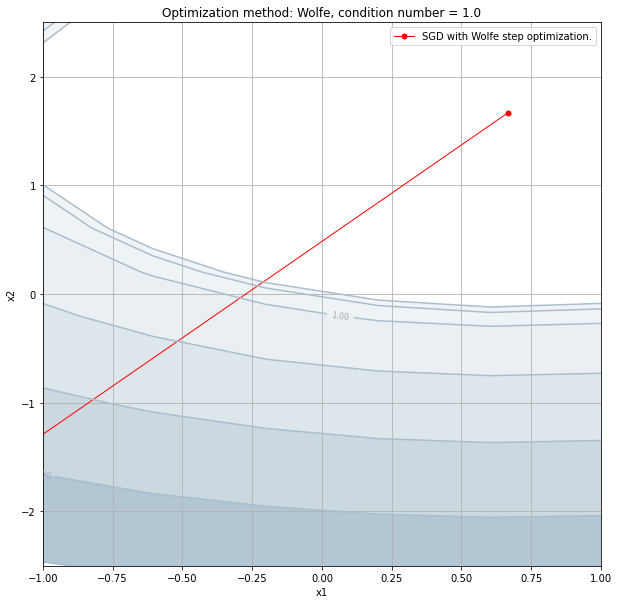

Solution: [0.66666667 1.66666667]
Iteration number: 1
------------------------------//--------------------------------------


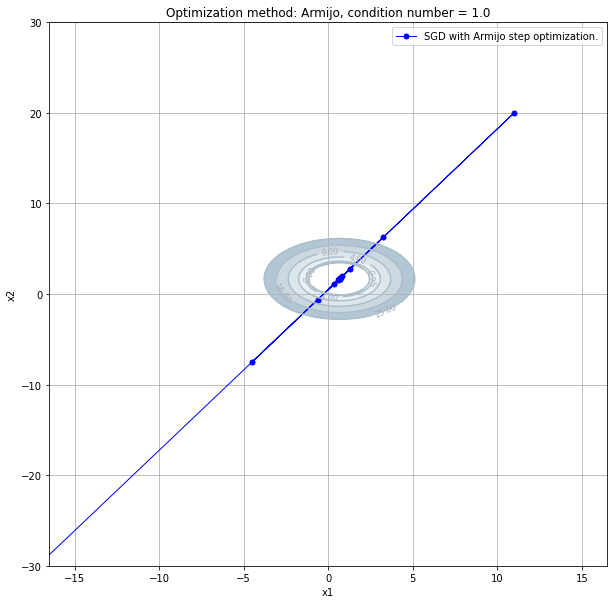

Solution: [0.66682434 1.66694641]
Iteration number: 17
------------------------------//--------------------------------------


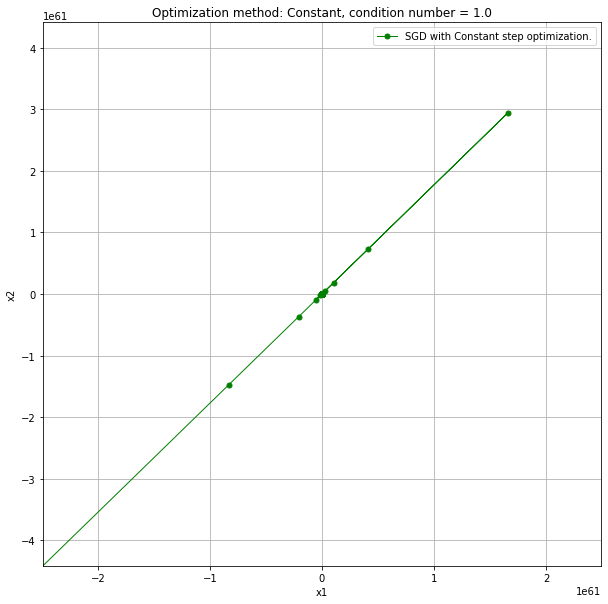

Solution: [-3.32100529e+61 -5.89210616e+61]
Iteration number: 200
------------------------------//--------------------------------------


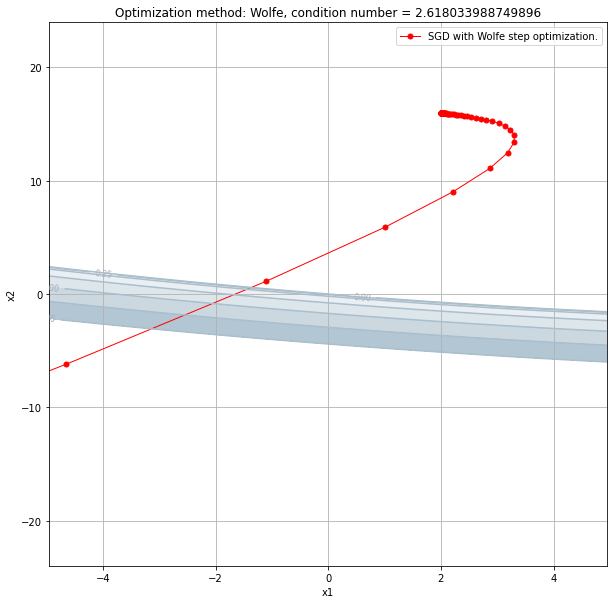

Solution: [ 2.00106466 15.999342  ]
Iteration number: 59
------------------------------//--------------------------------------


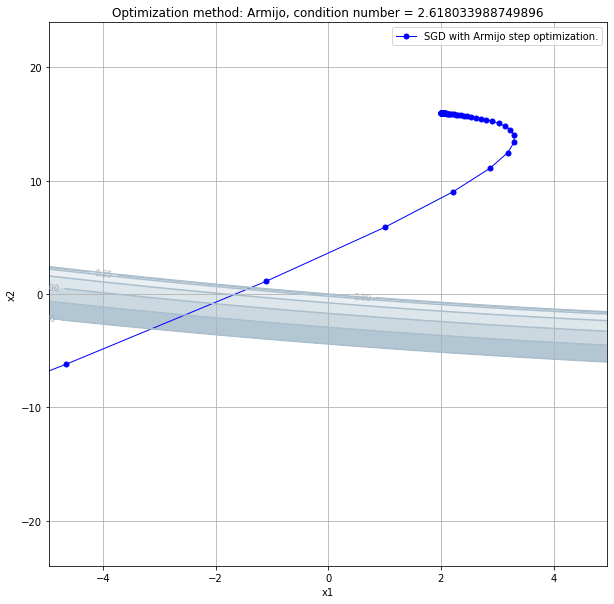

Solution: [ 2.00106466 15.999342  ]
Iteration number: 59
------------------------------//--------------------------------------


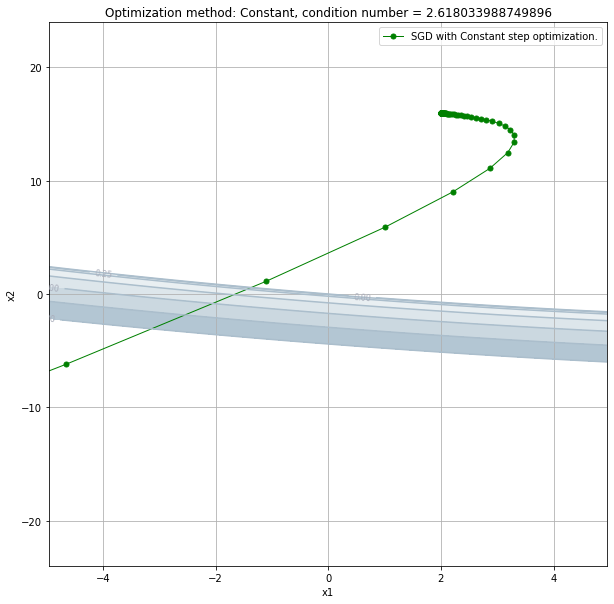

Solution: [ 2.00106466 15.999342  ]
Iteration number: 59
------------------------------//--------------------------------------


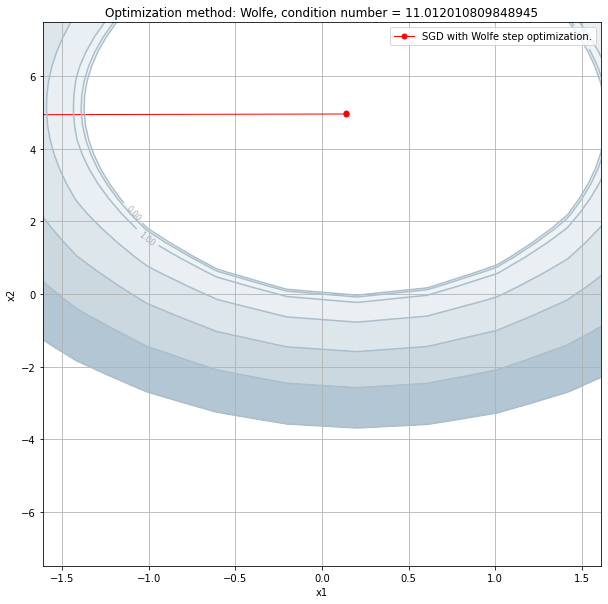

Solution: [0.13647112 4.98631827]
Iteration number: 4
------------------------------//--------------------------------------


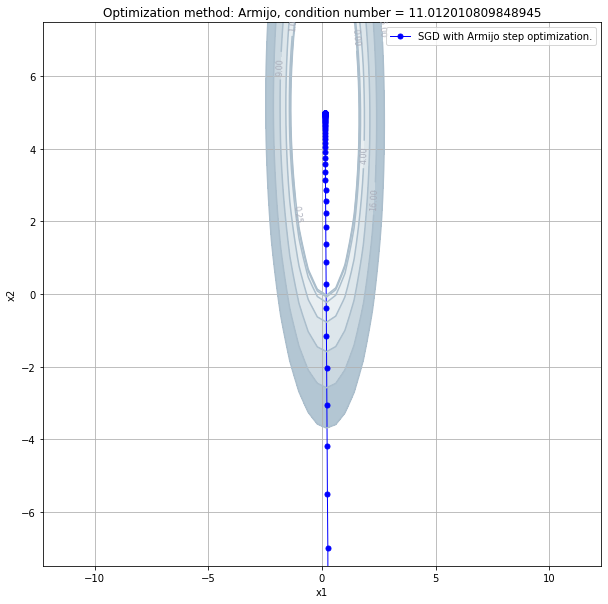

Solution: [0.13650827 4.98429599]
Iteration number: 74
------------------------------//--------------------------------------


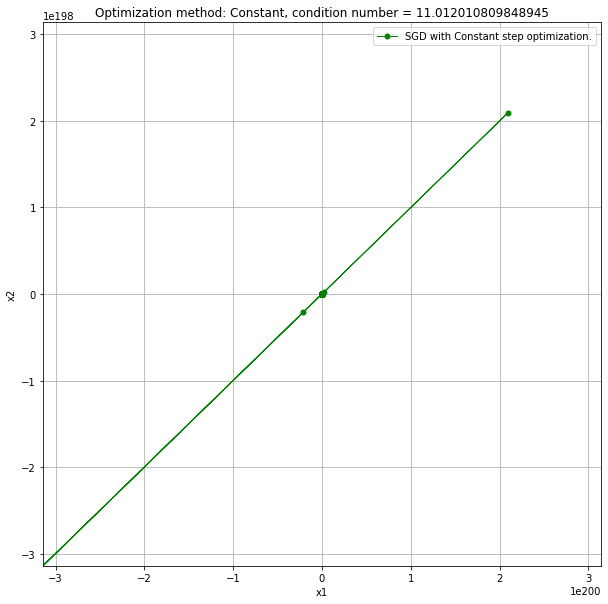

Solution: [-2.09490149e+201 -2.09469205e+199]
Iteration number: 200
------------------------------//--------------------------------------


In [ ]:
x_0 = np.array([-20, -35])
line_search_opt = [{'method': 'Wolfe', 'color': 'red'}, {'method': 'Armijo', 'color': 'blue'}, {'method': 'Constant', 'color': 'green'}]

for A_i in A:
    function = oracles.QuadraticOracle(A_i, b)
    
    
    
    for line_search_option in line_search_opt:
        method = methods.GradientDescent(function, x_0, tolerance=1e-10, line_search_options=line_search_option)
        x_k = method.run(200)
        plt.figure(figsize=(10, 10))
        plot_trajectory_2d.plot_trajectory(function.func, method.hist['x'], fit_axis=True,
                                           label=f'SGD with {line_search_option["method"]} step optimization.' ,
                                           color=line_search_option['color'])
        plot_trajectory_2d.plot_levels(function.func, xrange=[-20, 20], yrange=[-20, 20], levels=None)
    
        plt.legend()
        plt.title(f"Optimization method: {line_search_option['method']}, condition number = {np.linalg.cond(A_i)}")
        plt.xlabel('x1', fontsize='10')
        plt.ylabel('x2', fontsize='10')
        plt.show()

        print(f"Solution: {x_k}")
        print(f"Iteration number: {len(method.hist['x']) - 1}", ) 
        print('------------------------------//--------------------------------------')


###Выводы:

     Метод    | Число обусловленности  | Число итераций
    __________________________________________________
    Вульфа   |                        |       1
    Армихо   |            1           |       17
    Константа|                        |    не сошелся
    ___________________________________________________
    Вульфа   |                        |       59
    Армихо   |            2.6         |       59
    Константа|                        |       59
    ___________________________________________________
    Вульфа   |                        |       4
    Армихо   |             11         |       74
    Константа|                        |     не сошелся
    ___________________________________________________
Сравнивая результаты двух экспериментов, нельзя сделать вывод о том. что число итераций методов зависят от выбора начальной точки, т.к. 
 - для числа обусловленности(ЧО) 1 ничего не изменилось
 - для ЧО 2,6 все методы сработали даже быстрее, хотя начальная точка выбрана дальше от решения для всех трех задач
 - для ЧО 11 метод Вульфа сходился дольше, Армихо сработал быстрее, а с постоянным шагом не сошелся

###2.3 Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства (3 балла)

In [ ]:
n_range = [10, 100, 1000]
k_max = 100
n_tests = 10

N_n_k = np.zeros((3, k_max - 1, n_tests))

for i, n in enumerate(n_range):
  for k in range(1, k_max):
    for j in range(n_tests):
      lamda_i = np.random.uniform(1, k, size=n)
      lamda_i[0] = 1
      lamda_i[n - 1] = k
      A = np.diag(lamda_i)
      b = np.random.normal(size=n)
      x_0 = np.random.normal(size=n)
      function = oracles.QuadraticOracle(A, b)
      method = methods.GradientDescent(function, x_0, tolerance=1e-10, line_search_options={'method': 'Wolfe'})
      method.run(200)
      
      N_n_k[i, k - 1, j] = len(method.hist['x']) - 1


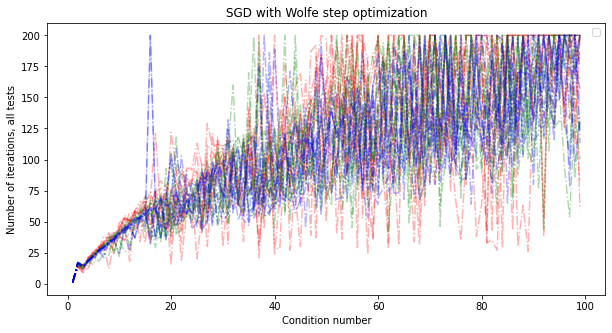

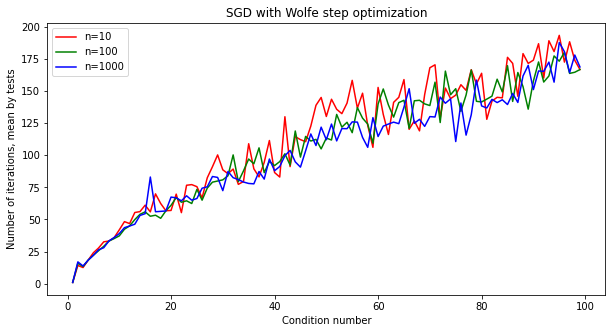

In [ ]:
plt.figure(figsize=(10, 5))

color = ['red', 'green', 'blue']
for i in range(len(n_range)):
    for j in range(n_tests):
      plt.plot(range(1, k_max), N_n_k[i, :, j], color=color[i], alpha=0.3, linestyle = '-.')
   
plt.title('SGD with Wolfe step optimization')
plt.ylabel('Number of iterations, all tests')
plt.xlabel('Condition number')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))

for i in range(len(n_range)):
    plt.plot(range(1, k_max), N_n_k[i].mean(axis=1), color=color[i], label=f'n={n_range[i]}')

plt.title('SGD with Wolfe step optimization')
plt.ylabel('Number of iterations, mean by tests')
plt.xlabel('Condition number')
plt.legend()
plt.show()

    

##Выводы:
На графике видна линейная зависимость числа итераций N от числа обусловленности матрицы, что полностью согласуется с теорией. 

##2.4 Градиентный спуск на задаче логистической регрессии (3 балла)

#ДОДЕЛАЮ ДО 27.03

In [ ]:
import shutil
import tempfile
import urllib.request
from sklearn.datasets import load_svmlight_file

data_urls = ['https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a', 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/gisette_scale.bz2', 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/real-sim.bz2']


In [ ]:
def log_reg_fit(url):
    with urllib.request.urlopen(url) as response:
      with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
        shutil.copyfileobj(response, tmp_file)

    A, b = load_svmlight_file(tmp_file.name)
    x_0 = np.random.normal(size=A.shape[1])
   
    function = oracles.create_log_reg_oracle(A, b, regcoef)
    plt.figure(figsize=(10, 10)) 
    
    for line_search_option in line_search_opt:
        method = methods.GradientDescent(function, x_0, tolerance=1e-10, line_search_options=line_search_option)
        x_k = method.run(100)
       
        plt.plot(method.hist['time'], method.hist['grad_norm'],
                 label=f'SGD with {line_search_option["method"]} step optimization.',
                 color=line_search_option['color'])
        

    plt.legend()
    plt.title(f"Covergence for dataset {url.split('/')[-1]}")
    plt.xlabel('time', fontsize='10')
    plt.ylabel('||grad(x)||2', fontsize='10')
    plt.show()
      

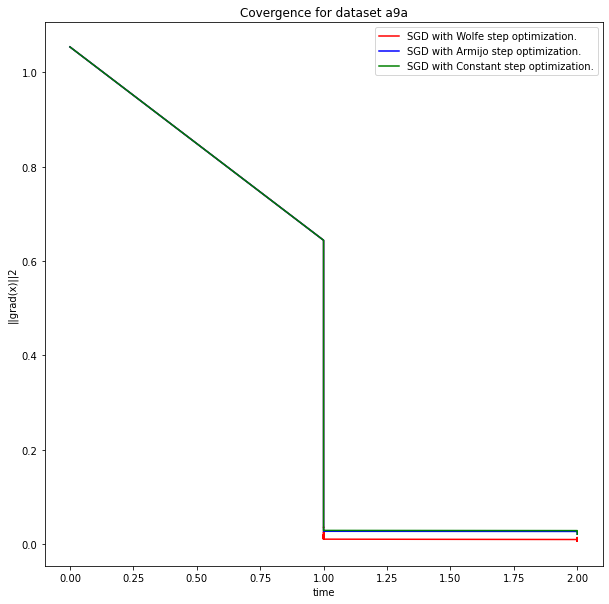

In [ ]:
line_search_opt = [{'method': 'Wolfe', 'color': 'red'}, {'method': 'Armijo', 'color': 'blue'}, {'method': 'Constant', 'color': 'green'}]
regcoef = 10 ** (-3)

log_reg_fit(data_urls[0])
